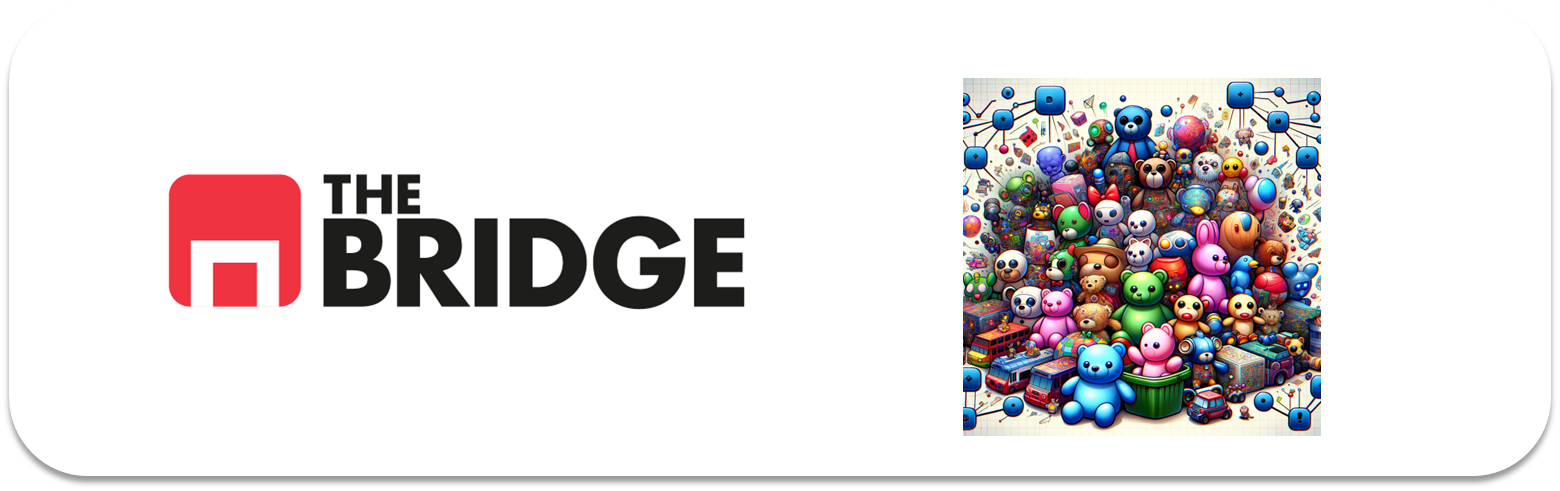

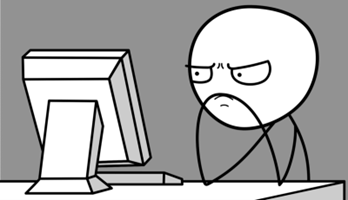

## PRACTICA OBLIGATORIA: DBSCAN y CLUSTERING JERARQUICO

* La práctica obligatoria de esta unidad consiste en un ejercicio de modelado no supervisado aplicado a clustering jerárquico y no jerárquico. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import bootcampviztools as bc

### Parte I. Modelado

#### Descripción del problema.

En una planta de experimentación con nuevas bebidas energéticas están trabajando con diferentes mezclas de componentes para obtener posibles variedades de su producto estrella "NonstopU". El problema es que la fabricación de cada "prototipo" conlleva demasiado tiempo y las pruebas de sabores y de propiedades "non-stop" antisueño y antifatiga son costosas.  

En ese sentido quieren construir algún sistema de segmentación previa de mezclas sin probarlas solo indicando las cantidades de cada componente de la bebida. Tienen datos pero desgraciadamente de mezclas anteriores con diferentes medidas pero que por temas presupuestarios y de prioridad no se hicieron test con usuarios y potenciales clientes, es decir no tienen un target de capacidad antifatiga o de preferncia del usuario que puedas servirles para construir un clasificador clásico como han hecho otras veces.  

Han acudido a vosotros con la necesida de encontrar ese segmentador de posibles bebidas y con los datos de las mezclas no probadas anteriores por ver si vostros podéis ayudarles a encontrar algún tipo de segmentación que luego ello se encargarían de interpretar. No es requisito obligatorio pero les gustaría también poder establecer algún tipo de relación entre las segmentaciones (tipo cuales segmentos se "parecerían" más entre sí)

NOTA ORIENTATIVA: Los químicos no esperan que haya menos de 3 segmentos ni más de 5.  
NOTA OPERATIVA: El dataset con los datos que nos han dado los químicos está en "./data/empowering_drinks.csv"

**Se pide**: Construir al menos dos algoritmos de clustering (DBSCAN debe ser uno de ellos y el otro debería estar claro cual deberíamos usar dado el enunciado). Compararlos brevemente aunque sea meramente especulativo (¿Por qué es espculativo?)

**Se recomienda**: Visualizar las features dos a dos para escoger las mejores, no necesariamente hay que usar todas, ni tampoco quedarse en dos. Probar diferentes hiperparámetros en función de la nota orientativa y explicar porqué se han escogido los que finalmente se hayan escogido. 

Recuerda que el proceso es similar a lo que vimos en el otro tipo de aprendizaje:
1. Entender el problema
2. Cargar datos, visualizar.
3. MiniEDA: Selección de features
4. Tratamiento de Features.
5. Selección de modelos, selección de hiperparámetros
6. Entrenamiento, visualización de resultados.
7. Discusión de los mismos


In [42]:
df = pd.read_csv("./data/empowering_drinks.csv", delimiter="|")

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Azúcares               153 non-null    float64
 1   Vitamínas del grupo B  153 non-null    float64
 2   Cafeína                153 non-null    float64
 3   Ácido Cítrico          153 non-null    float64
 4   Taurina                153 non-null    float64
dtypes: float64(5)
memory usage: 6.1 KB


In [44]:
df.columns

Index(['Azúcares', 'Vitamínas del grupo B', 'Cafeína', 'Ácido Cítrico',
       'Taurina'],
      dtype='object')

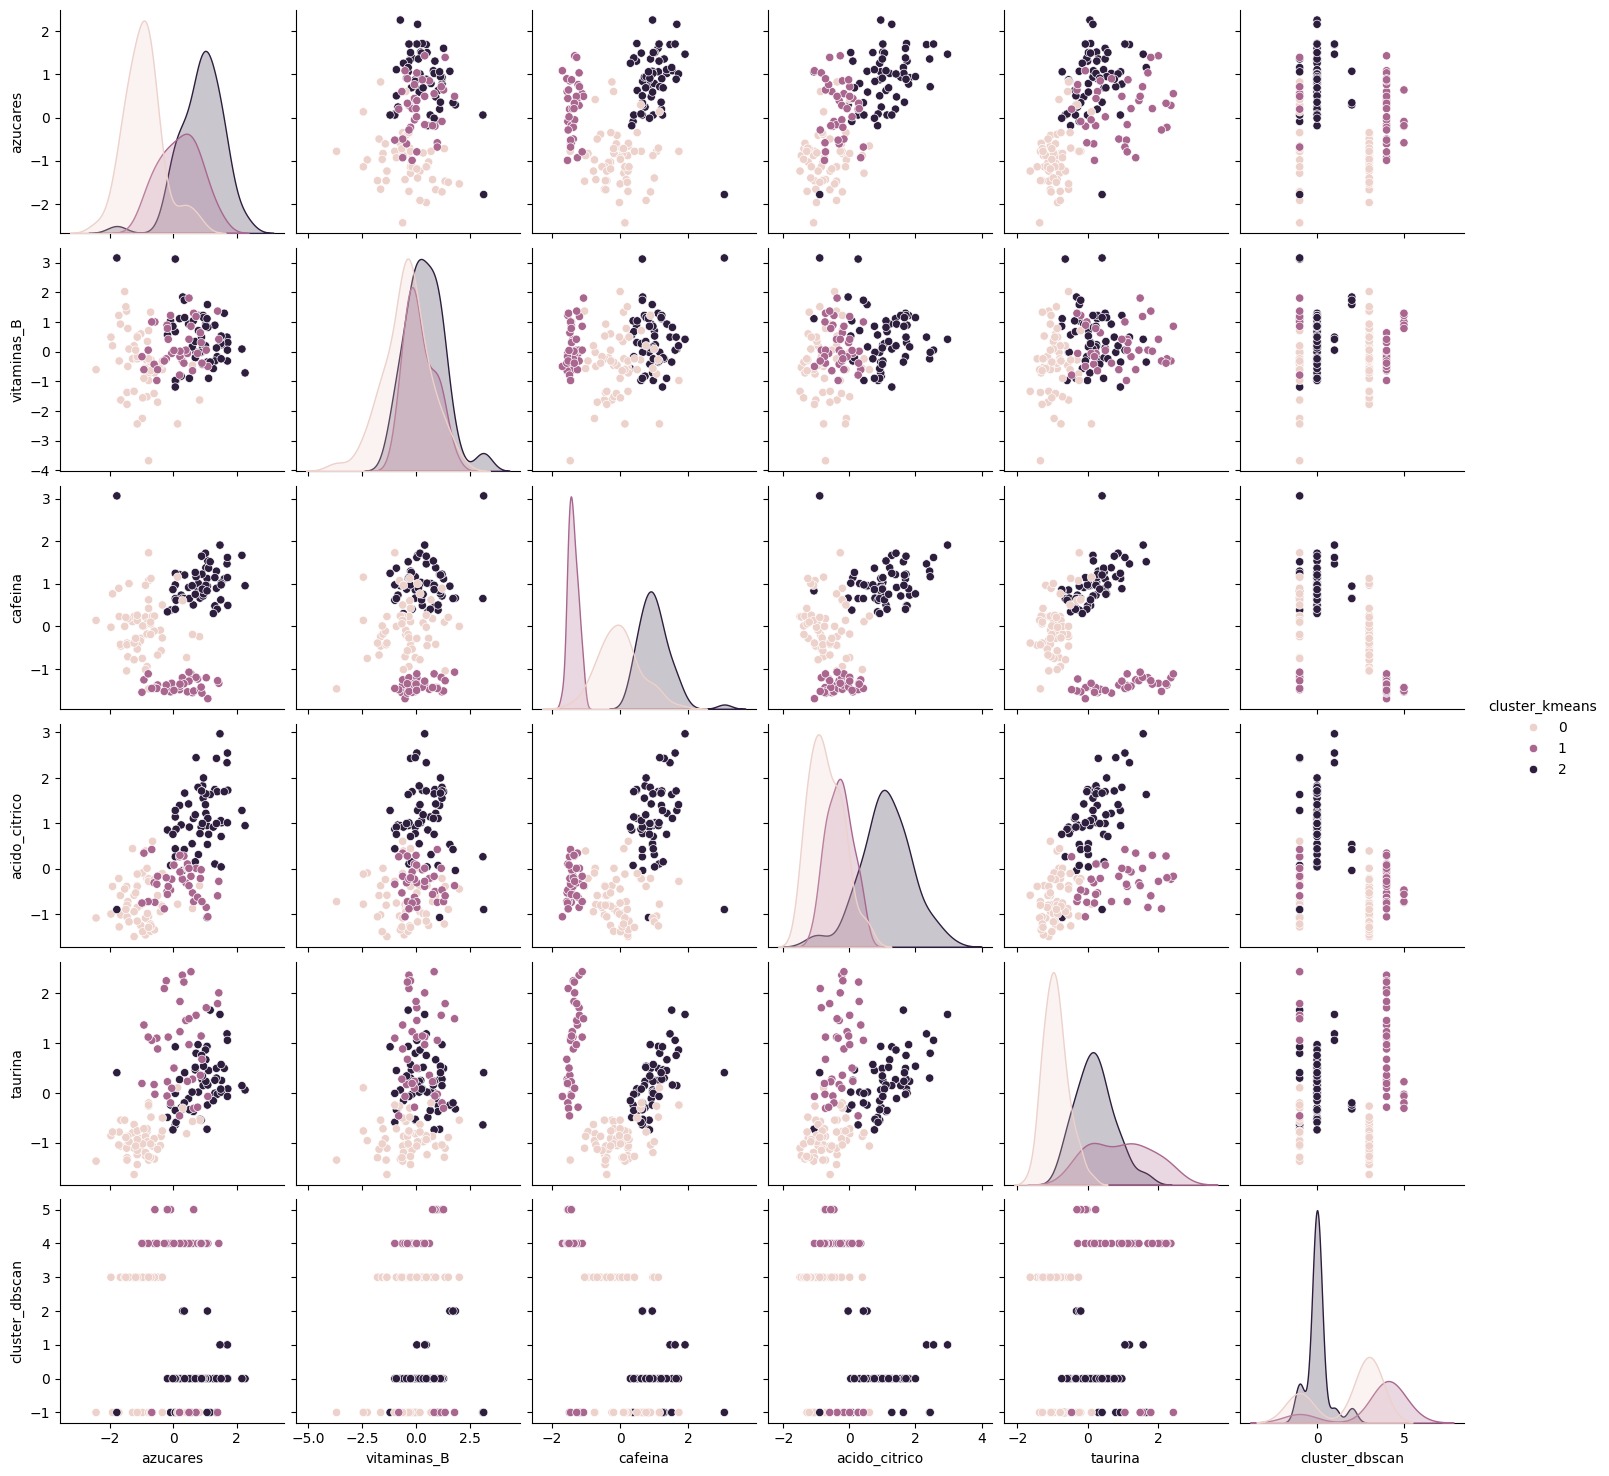

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hacer un pairplot para ver las relaciones entre las variables
sns.pairplot(df, hue="cluster_kmeans", diag_kind="kde")
plt.show()

In [45]:
# Renombrar columnas
df.rename(columns={
    'Azúcares': 'azucares',
    'Vitamínas del grupo B': 'vitaminas_B',
    'Cafeína': 'cafeina',
    'Ácido Cítrico': 'acido_citrico',
    'Taurina': 'taurina'
}, inplace=True)

# Verificar el cambio
print(df.head())



   azucares  vitaminas_B   cafeina  acido_citrico   taurina
0  1.518613     0.232053  1.034819       1.013009  0.251717
1  0.246290    -0.827996  0.733629       0.965242 -0.293321
2  0.196879     1.109334  1.215533       1.395148  0.269020
3  1.691550     0.487926  1.466525       2.334574  1.186068
4  0.295700     1.840403  0.663351      -0.037874 -0.319276


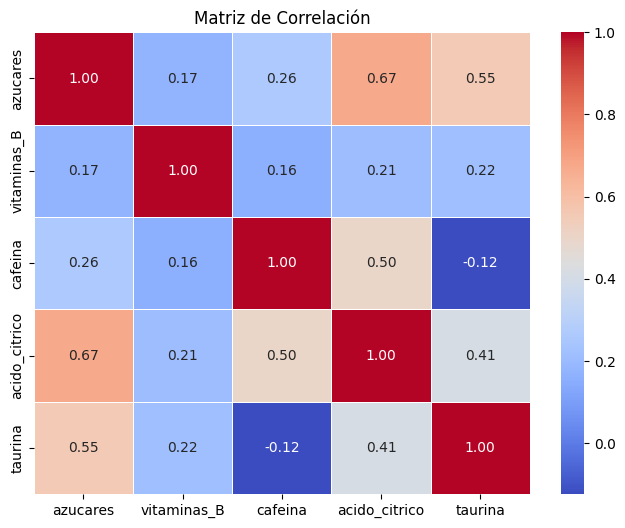

In [36]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Título
plt.title("Matriz de Correlación")
plt.show()

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN


# Seleccionar solo las columnas numéricas relevantes
features = ['azucares', 'vitaminas_B', 'cafeina', 'acido_citrico', 'taurina']
X = df

# Normalizar los datos (DBSCAN es sensible a escalas diferentes)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [53]:
# Entrenar el modelo DBSCAN
dbscan = DBSCAN(eps=0.7, min_samples=5)
df['cluster_dbscan'] = dbscan.fit_predict(X_scaled)

# Ver cuántos clusters detectó (-1 significa "ruido", puntos no asignados)
print(df['cluster_dbscan'].value_counts())

cluster_dbscan
-1    123
 2     15
 1     10
 0      5
Name: count, dtype: int64


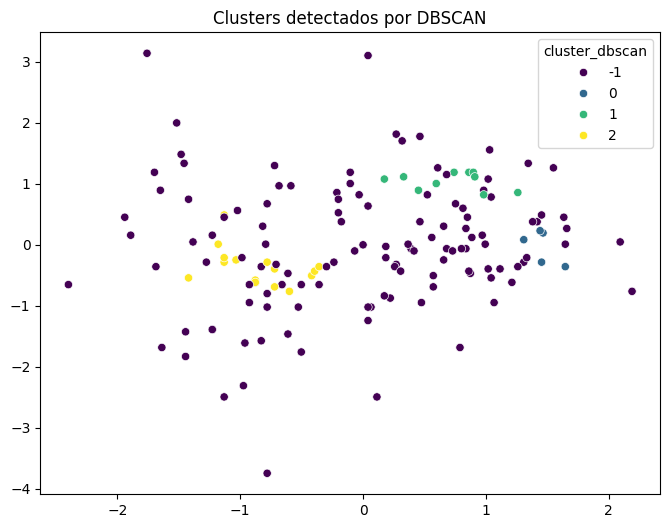

In [54]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=df['cluster_dbscan'], palette="viridis")
plt.title("Clusters detectados por DBSCAN")
plt.show()

In [55]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Seleccionar solo las columnas numéricas relevantes
features = ['azucares', 'vitaminas_B', 'cafeina', 'acido_citrico', 'taurina']
X = df[features]

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Mejor DBSCAN - eps: 0.9000000000000001, min_samples: 3, Silhouette Score: 0.135
Mejor K-Means - k: 3, Silhouette Score: 0.398


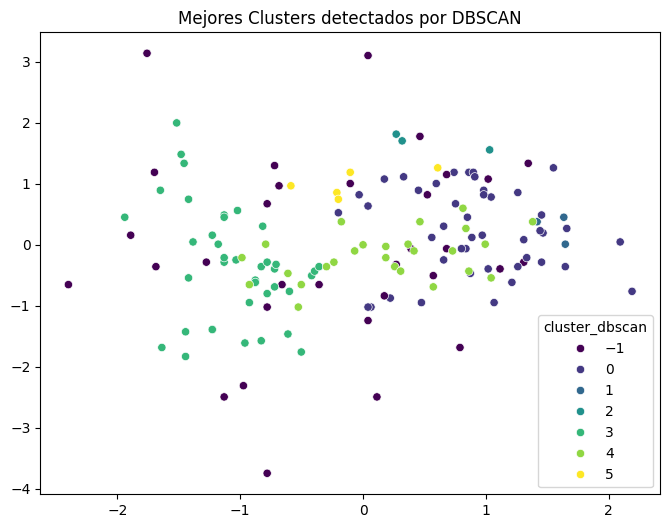

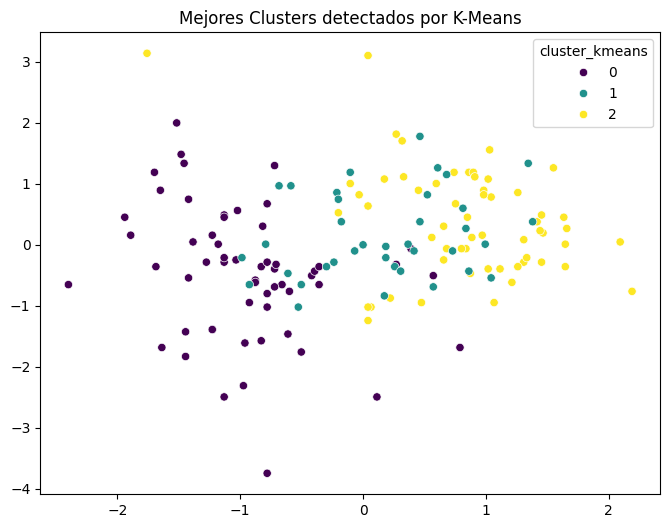

In [ ]:
inertia = []
K_range = range(2, 10)  # Probamos entre 2 y 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)  # Guardamos la inercia (suma de distancias al centroide)

# Graficar el método del codo
plt.figure(figsize=(8,6))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel("Número de Clusters")
plt.ylabel("Inercia")
plt.title("Método del Codo para elegir K")
plt.show()


In [57]:
# Entrenar K-Means
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['cluster_kmeans'] = kmeans.fit_predict(X_scaled)

# Ver cuántos elementos hay en cada cluster
print(df['cluster_kmeans'].value_counts())


cluster_kmeans
2    50
3    43
1    37
0    23
Name: count, dtype: int64


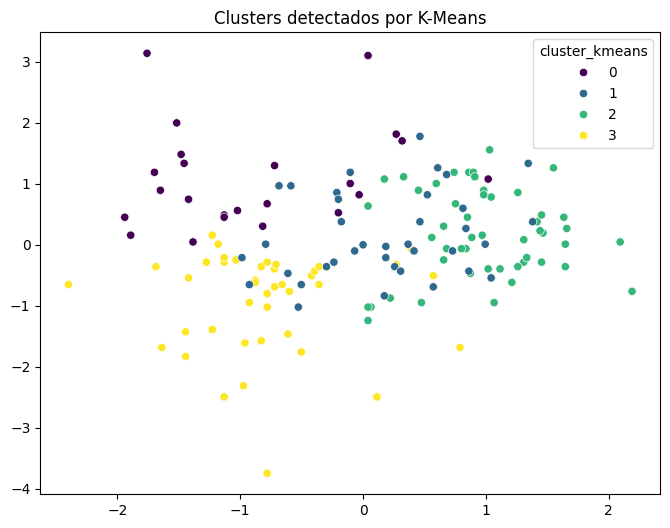

In [58]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=df['cluster_kmeans'], palette="viridis")
plt.title("Clusters detectados por K-Means")
plt.show()

In [59]:
score = silhouette_score(X_scaled, df['cluster_kmeans'])
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.356


In [ ]:
### seleccionado Features

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN


# Seleccionar solo las columnas numéricas relevantes
features = ['azucares', 'cafeina', 'taurina']
X = df[features]

# Normalizar los datos (DBSCAN es sensible a escalas diferentes)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [85]:
# Entrenar el modelo DBSCAN
dbscan = DBSCAN(eps=0.7, min_samples=5)
df['cluster_dbscan'] = dbscan.fit_predict(X_scaled)

# Ver cuántos clusters detectó (-1 significa "ruido", puntos no asignados)
print(df['cluster_dbscan'].value_counts())

cluster_dbscan
 0    106
 1     37
-1     10
Name: count, dtype: int64


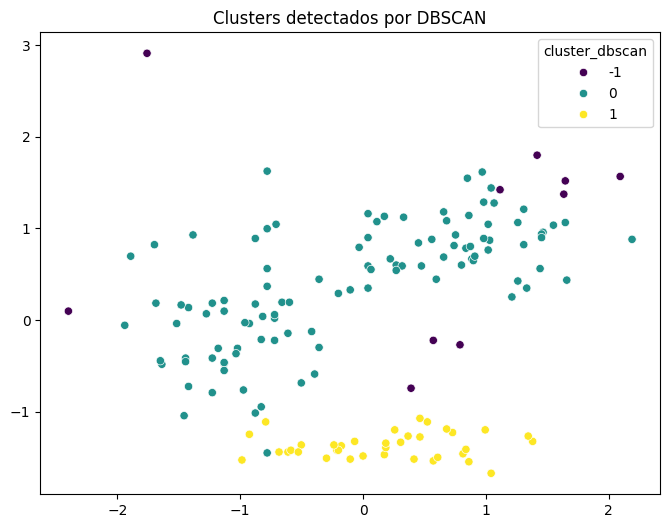

In [86]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=df['cluster_dbscan'], palette="viridis")
plt.title("Clusters detectados por DBSCAN")
plt.show()

In [87]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Seleccionar solo las columnas numéricas relevantes
features = ['azucares', 'cafeina', 'taurina']
X = df[features]

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


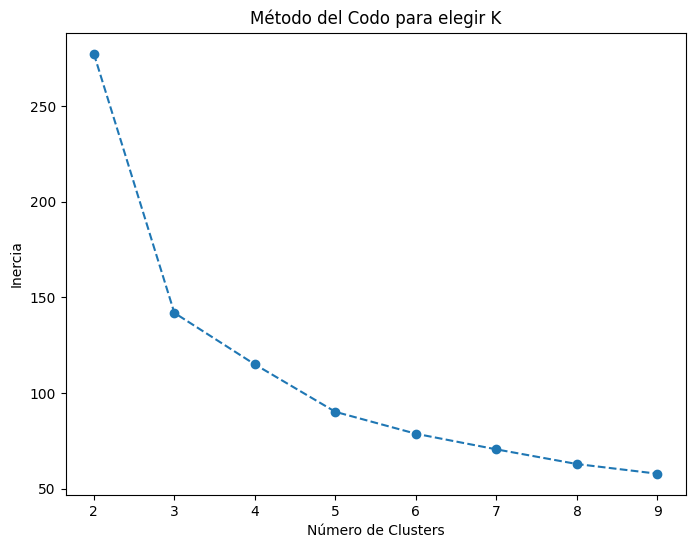

In [88]:
inertia = []
K_range = range(2, 10)  # Probamos entre 2 y 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)  # Guardamos la inercia (suma de distancias al centroide)

# Graficar el método del codo
plt.figure(figsize=(8,6))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel("Número de Clusters")
plt.ylabel("Inercia")
plt.title("Método del Codo para elegir K")
plt.show()


In [89]:
# Entrenar K-Means
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['cluster_kmeans'] = kmeans.fit_predict(X_scaled)

# Ver cuántos elementos hay en cada cluster
print(df['cluster_kmeans'].value_counts())


cluster_kmeans
1    48
0    39
3    37
2    29
Name: count, dtype: int64


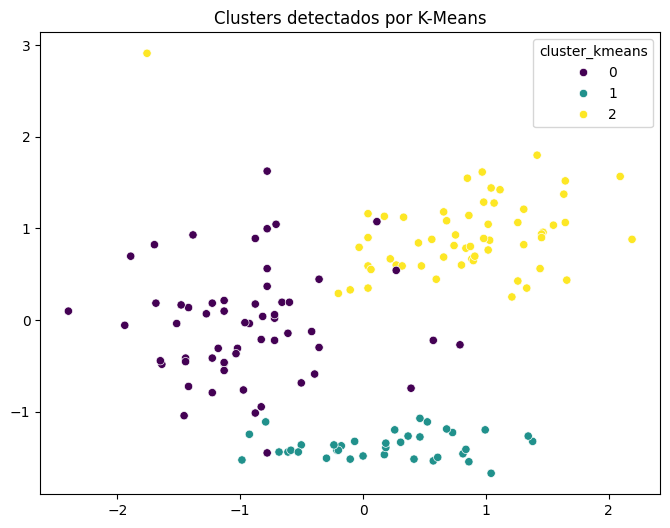

In [76]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=df['cluster_kmeans'], palette="viridis")
plt.title("Clusters detectados por K-Means")
plt.show()

In [91]:
score = silhouette_score(X_scaled, df['cluster_kmeans'])
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.424


In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN


# Seleccionar solo las columnas numéricas relevantes
features = ['cafeina', 'taurina']
X = df[features]

# Normalizar los datos (DBSCAN es sensible a escalas diferentes)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [94]:
# Entrenar el modelo DBSCAN
dbscan = DBSCAN(eps=0.7, min_samples=5)
df['cluster_dbscan'] = dbscan.fit_predict(X_scaled)

# Ver cuántos clusters detectó (-1 significa "ruido", puntos no asignados)
print(df['cluster_dbscan'].value_counts())

cluster_dbscan
 0    152
-1      1
Name: count, dtype: int64


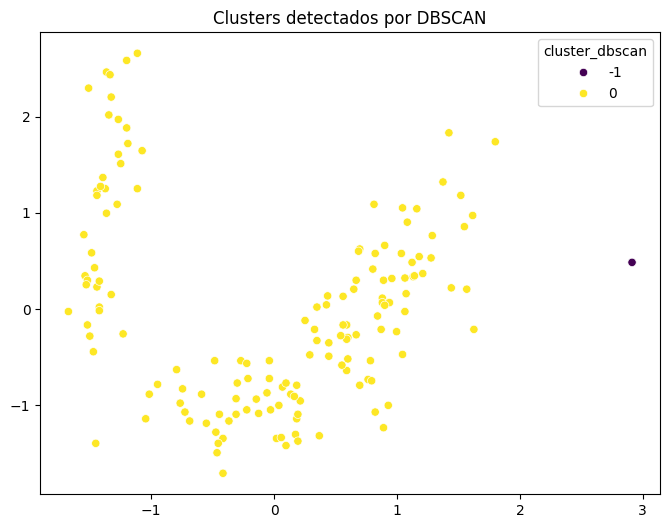

In [95]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=df['cluster_dbscan'], palette="viridis")
plt.title("Clusters detectados por DBSCAN")
plt.show()

In [96]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Seleccionar solo las columnas numéricas relevantes
features = ['azucares', 'vitaminas_B', 'cafeina', 'acido_citrico', 'taurina']
X = df[features]

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


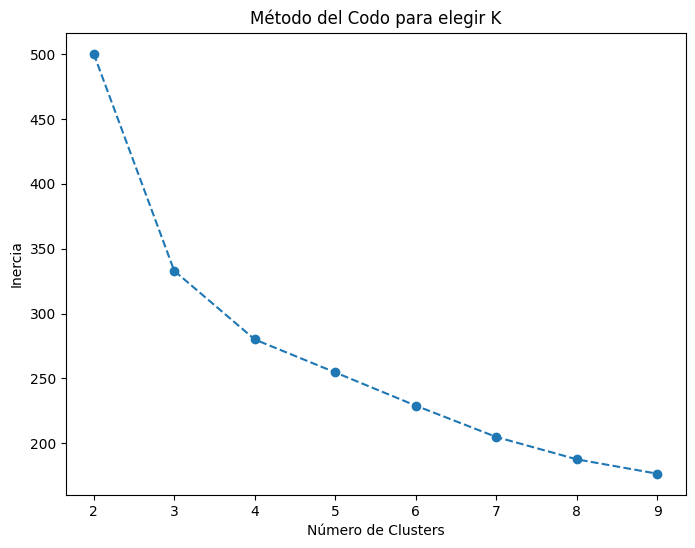

In [97]:
inertia = []
K_range = range(2, 10)  # Probamos entre 2 y 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)  # Guardamos la inercia (suma de distancias al centroide)

# Graficar el método del codo
plt.figure(figsize=(8,6))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel("Número de Clusters")
plt.ylabel("Inercia")
plt.title("Método del Codo para elegir K")
plt.show()


In [ ]:
# Entrenar K-Means
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['cluster_kmeans'] = kmeans.fit_predict(X_scaled)

# Ver cuántos elementos hay en cada cluster
print(df['cluster_kmeans'].value_counts())


cluster_kmeans
2    50
3    43
1    37
0    23
Name: count, dtype: int64


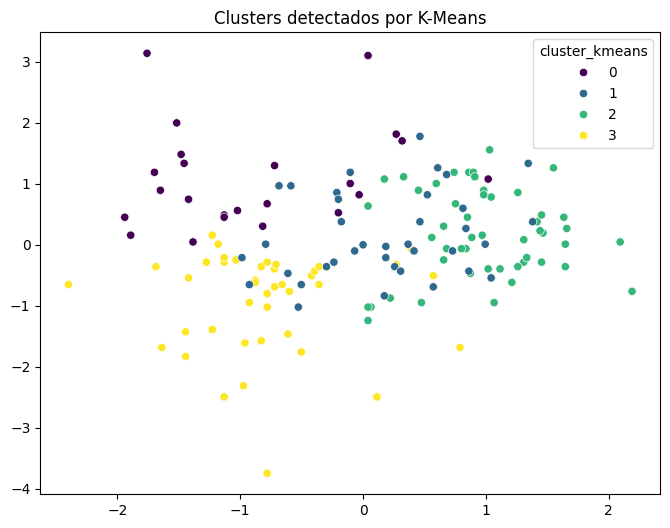

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=df['cluster_kmeans'], palette="viridis")
plt.title("Clusters detectados por K-Means")
plt.show()

In [98]:
score = silhouette_score(X_scaled, df['cluster_kmeans'])
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.303


### Parte II. Nuevos experimentos

Los químicos están muy esperanzados con los modelos que les habéis mostrado y os pasan una lista de nuevos experimentos para que los clasifiquéis. Emplea uno de los modelos construidos, el que te resulte más sencillo, para segmentar los nuevos experimentos que puedes encontrar en "./data/new_experiments.csv"

In [101]:
df_new = pd.read_csv("./data/new_experiments.csv",delimiter="|")
df_new

# Renombrar columnas
df_new.rename(columns={
    'Azúcares': 'azucares',
    'Vitamínas del grupo B': 'vitaminas_B',
    'Cafeína': 'cafeina',
    'Ácido Cítrico': 'acido_citrico',
    'Taurina': 'taurina'
}, inplace=True)

### Parte III. EXTRA (Voluntario): 6 meses después...

La unidad de experimentación recibió un presupuesto adicional gracias a los modelos que les proporcionastes e hizo pruebas con cliente y obtuvo resultados como para clasificar cada bebida en terminos de "energización" en tres niveles (1, media; 2, media-alta, 3, alta). El resultado de los mismos está en el fichero adecuado en el directorio data y alineado con los experimentos iniciales y al final con los nuevos experimentos de la parte anterior.

Evalua la segmentación de los modelos creados en la primera parte.